In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")

import warnings
warnings.filterwarnings('ignore')

In [2]:
customer = pd.read_csv(r'C:\Users\user\Desktop\Python\Credit card\Customer Acqusition.csv')
repay = pd.read_csv(r'C:\Users\user\Desktop\Python\Credit card\Repayment.csv')
spend = pd.read_csv(r'C:\Users\user\Desktop\Python\Credit card\spend.csv')
                       

In [3]:
customer.head()


,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [4]:
customer.dtypes

No            int64
Customer     object
Age           int64
City         object
Product      object
Limit       float64
Company      object
Segment      object
dtype: object

In [5]:
customer.isnull().sum()

No          0
Customer    0
Age         0
City        0
Product     0
Limit       0
Company     0
Segment     0
dtype: int64

In [6]:
repay.head()

,SL No:,Customer,Month,Amount,Unnamed: 4
0,NaN,A1,12-Jan-04,495414.75,NaN
1,2.0,A1,3-Jan-04,245899.02,NaN
2,3.0,A1,15-Jan-04,259490.06,NaN
3,4.0,A1,25-Jan-04,437555.12,NaN
4,5.0,A1,17-Jan-05,165972.88,NaN


In [7]:
#Drop the unnamed columns,SL No from repayment_data 
repay.drop(['Unnamed: 4','SL No:'],axis=1,inplace=True)

In [8]:
#drop the rows which contain missing values
repay.dropna(axis=0,inplace=True)

In [9]:
#change the type of month column from object to datetime
repay['Month']=repay['Month'].apply(lambda x:pd.to_datetime(x))

In [10]:
repay.head()

,Customer,Month,Amount
0,A1,2004-01-12,495414.75
1,A1,2004-01-03,245899.02
2,A1,2004-01-15,259490.06
3,A1,2004-01-25,437555.12
4,A1,2005-01-17,165972.88


In [11]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,12-Jan-04,JEWELLERY,485470.80
1,2,A1,3-Jan-04,PETRO,410556.13
2,3,A1,15-Jan-04,CLOTHES,23740.46
3,4,A1,25-Jan-04,FOOD,484342.47
4,5,A1,17-Jan-05,CAMERA,369694.07


In [12]:
#drop the rows which contain missing values
spend.dropna(axis=0,inplace=True)

In [13]:
#change the type of month column from object to datetime
spend['Month']=spend['Month'].apply(lambda x:pd.to_datetime(x))

### 1a. In case age is less than 18, replace it with mean of age values.


In [15]:
mean_age = customer['Age'].mean()
print('The mean value is:',mean_age)

The mean value is: 46.49


In [16]:
customer.loc[customer['Age']<18,'Age'] = mean_age

In [17]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [18]:
# Customer with age less than 18 has been replaced with mean age value
customer.loc[13]

No                    14
Customer             A14
Age                46.49
City           BANGALORE
Product             Gold
Limit           500000.0
Company              C14
Segment     Salaried_Pvt
Name: 13, dtype: object

### b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit.

In [19]:
customer.head()

,No,Customer,Age,City,Product,Limit,Company,Segment
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,2,A2,71.0,CALCUTTA,Silver,100000.0,C2,Salaried_MNC
2,3,A3,34.0,COCHIN,Platimum,10000.0,C3,Salaried_Pvt
3,4,A4,47.0,BOMBAY,Platimum,10001.0,C4,Govt
4,5,A5,56.0,BANGALORE,Platimum,10002.0,C5,Normal Salary


In [20]:
spend.head()

,Sl No:,Customer,Month,Type,Amount
0,1,A1,2004-01-12,JEWELLERY,485470.80
1,2,A1,2004-01-03,PETRO,410556.13
2,3,A1,2004-01-15,CLOTHES,23740.46
3,4,A1,2004-01-25,FOOD,484342.47
4,5,A1,2005-01-17,CAMERA,369694.07


In [21]:
customer_spend = pd.merge(left=customer,right=spend,on='Customer',how='left')
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


In [22]:
customer_spend.loc[customer_spend['Amount']>customer_spend['Limit'],'Amount'] = (50*customer_spend['Limit'])/ 100

In [23]:
customer_spend.head()

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07


In [24]:
# No customers have amount greater than limit
customer_spend[customer_spend['Amount']>customer_spend['Limit']].sum().sum()

0.0

### c. Incase the repayment amount is more than the limit, replace the repayment with the limit.

In [25]:
# merging customer table and spend table on basis of customer
customer_repay = pd.merge(left=repay,right=customer,how='left',on='Customer')
customer_repay.head()

,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,2004-01-15,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,2004-01-25,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,2005-01-17,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [26]:
customer_repay.dtypes

Customer            object
Month       datetime64[ns]
Amount             float64
No                   int64
Age                float64
City                object
Product             object
Limit              float64
Company             object
Segment             object
dtype: object

In [29]:
# Replacing customers with amount greater than limit with the limit
customer_repay.loc[customer_repay['Amount']>customer_repay['Limit'],'Amount'] = customer_repay['Limit']

In [30]:
# customers having amount greater than the limit have been replaced with the limit.
customer_repay[customer_repay['Amount']>customer_repay['Limit']].sum().sum()

0.0

### 2a) How many distinct customers exist?

In [31]:
distinct_cust = customer['Customer'].nunique()
distinct_cust

100

### b) How many distinct categories exist?

In [32]:
distinct_category = customer_spend['Product'].drop_duplicates()
distinct_category

0         Gold
18      Silver
29    Platimum
Name: Product, dtype: object

### c) What is the average monthly spend by customers?

In [33]:
Customer_Spend_Amount=customer_spend.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
Customer_Spend_Amount

,Customer,Month,Amount
0,A1,2004-01-03,410556.130
1,A1,2004-01-12,463017.010
2,A1,2004-01-15,23740.460
3,A1,2004-01-25,439656.715
4,A1,2004-02-05,52208.650
...,...,...,...
1252,A95,2004-01-15,240401.500
1253,A96,2004-01-25,54729.660
1254,A97,2004-01-12,5000.000
1255,A98,2004-01-03,5000.500


In [34]:
Customer_Spend_Amount.dtypes

Customer            object
Month       datetime64[ns]
Amount             float64
dtype: object

In [35]:
Customer_Spend_Amount['Month'] = Customer_Spend_Amount['Month'].apply(lambda x:pd.to_datetime(x))

In [36]:
Customer_Spend_Amount['Spend_Month']=Customer_Spend_Amount['Month'].apply(lambda x:x.month)

In [37]:
Avg_Monthly_Spend=Customer_Spend_Amount.groupby(['Customer','Spend_Month'])[['Amount']].mean().reset_index()

In [38]:
Avg_Monthly_Spend.head(10)

,Customer,Spend_Month,Amount
0,A1,1,341332.877000
1,A1,2,138421.151250
2,A1,4,261649.250000
3,A1,5,361141.310000
4,A1,8,344372.100000
5,A1,10,244534.680000
6,A1,11,183839.610000
7,A10,1,173828.282500
8,A10,2,170265.770000
9,A10,3,134631.266667


### d) What is the average monthly repayment by customers?


In [39]:
Customer_Repayment_Amount=customer_repay.groupby(['Customer','Month'])[['Amount']].mean().reset_index()
Customer_Repayment_Amount

,Customer,Month,Amount
0,A1,2004-01-03,245899.020
1,A1,2004-01-12,422930.785
2,A1,2004-01-15,356258.850
3,A1,2004-01-25,437555.120
4,A1,2004-02-05,117964.430
...,...,...,...
1276,A95,2004-01-15,369405.960
1277,A96,2004-01-25,100000.000
1278,A97,2004-01-12,10000.000
1279,A98,2004-01-03,10001.000


In [40]:
Customer_Repayment_Amount['Month'] = Customer_Repayment_Amount['Month'].apply(lambda x:pd.to_datetime(x))

In [41]:
Customer_Repayment_Amount['Repayment_Month']=Customer_Repayment_Amount['Month'].apply(lambda x:x.month)

In [42]:
Avg_Monthly_Repayment=Customer_Repayment_Amount.groupby(['Customer','Repayment_Month'])[['Amount']].mean().reset_index()

In [43]:
Avg_Monthly_Repayment.head(10)

,Customer,Repayment_Month,Amount
0,A1,1,325723.331000
1,A1,2,137713.785000
2,A1,4,254474.580000
3,A1,7,297176.740000
4,A1,9,186427.500000
5,A1,11,285729.090000
6,A10,1,283324.721667
7,A10,2,217344.503333
8,A10,3,240130.543333
9,A10,4,120467.322500


### e) If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? (Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)

In [44]:
Avg_Monthly_Customers=pd.merge(left=Avg_Monthly_Spend,right=Avg_Monthly_Repayment,left_on=['Customer','Spend_Month'],right_on=['Customer','Repayment_Month'])

In [45]:
Avg_Monthly_Customers['Monthly_Profit']=Avg_Monthly_Customers.Amount_y-Avg_Monthly_Customers.Amount_x

In [46]:
Avg_Monthly_Customers['Profit']=np.where(Avg_Monthly_Customers['Monthly_Profit']>0,Avg_Monthly_Customers['Monthly_Profit']*2.9/100,np.nan)

In [47]:
Avg_Monthly_Customers.head(10)

,Customer,Spend_Month,Amount_x,Repayment_Month,Amount_y,Monthly_Profit,Profit
0,A1,1,341332.877000,1,325723.331000,-15609.546000,NaN
1,A1,2,138421.151250,2,137713.785000,-707.366250,NaN
2,A1,4,261649.250000,4,254474.580000,-7174.670000,NaN
3,A1,11,183839.610000,11,285729.090000,101889.480000,2954.794920
4,A10,1,173828.282500,1,283324.721667,109496.439167,3175.396736
5,A10,2,170265.770000,2,217344.503333,47078.733333,1365.283267
6,A10,3,134631.266667,3,240130.543333,105499.276667,3059.479023
7,A10,4,270721.680000,4,120467.322500,-150254.357500,NaN
8,A10,5,189207.392500,5,98672.695000,-90534.697500,NaN
9,A10,7,239798.030000,7,358194.650000,118396.620000,3433.501980


### f) What are the top 5 product types?

In [48]:
top_product = spend['Type'].value_counts().head()
top_product

PETRO           200
FOOD            160
CAMERA          160
AIR TICKET      147
TRAIN TICKET    132
Name: Type, dtype: int64

### g) Which city is having maximum spend?

In [49]:
city = customer_spend.groupby('City')['Amount'].sum().idxmax()
print(city)

COCHIN


### h) Which age group is spending more money?

In [52]:
customer_spend['Age_Group']=np.where(((customer_spend.Age.astype(int) >= 18) &
                                                  (customer_spend.Age.astype(int) < 25)), 'Youth',
                                                 np.where(((customer_spend.Age.astype(int) >= 25) & 
                                                           (customer_spend.Age.astype(int) < 65)), 'Adult','Senior'))

In [54]:
age = customer_spend.groupby('Age_Group')[['Amount']].sum()

print(customer_spend.groupby('Age_Group').Amount.sum())
print("The age group 'senior' is spending more money")

Age_Group
Adult     1.674181e+08
Senior    3.768249e+07
Youth     1.468050e+07
Name: Amount, dtype: float64
The age group 'senior' is spending more money


### i) Who are the top 10 customers in terms of repayment?


In [55]:
customer_repay.head()

,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,2004-01-15,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,2004-01-25,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,2005-01-17,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [56]:
Cust_repay = customer_repay.groupby(by='Customer')[['Amount']].sum()
Cust_repay.sort_values('Amount',ascending=False).head(10)


,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A43,8489871.46
A45,8448334.87
A12,8334760.16
A14,7943268.63
A44,7744730.12
A39,7622483.30


### 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.

In [57]:
customer_spend.dtypes

No                    int64
Customer             object
Age                 float64
City                 object
Product              object
Limit               float64
Company              object
Segment              object
Sl No:                int64
Month        datetime64[ns]
Type                 object
Amount              float64
Age_Group            object
dtype: object

In [58]:
# converting month column to date time

customer_spend['Month'] = pd.to_datetime(customer_spend['Month'])

In [59]:
#creating new column 'Year'
customer_spend['Year'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format="%Y"))

In [60]:
# Creating a pivot table for amount spend by customer according to year and city
city_spend = customer_spend.pivot_table(index=['City','Year'],columns='Product',values='Amount',aggfunc='sum')
city_spend

Product                 Gold    Platimum      Silver
City       Year                                     
BANGALORE  2004   9289878.54  1112732.30  1291852.58
           2005  12892362.99   912284.97   830612.34
           2006  12030611.09   685831.27  1415480.94
BOMBAY     2004   6987853.53   897264.94   532089.03
           2005   8983018.28   711804.94   508988.54
           2006   7917144.31   972130.01  1092833.80
CALCUTTA   2004   7477140.98  2037690.30   500006.00
           2005  10303355.80  4434696.31   440147.06
           2006  11167532.77  3589606.66  1157956.42
CHENNAI    2004   1059618.50  3535652.38   282056.86
           2005   3740945.58  5053956.32   377184.49
           2006   2704288.62  5024923.40   350009.50
COCHIN     2004   7315850.15  3419904.07   814229.62
           2005  12110613.03  4960921.71   652269.38
           2006  10499142.38  4920592.29  1269990.87
DELHI      2004   2806495.00   283512.89   768172.30
           2005   1964845.27   494157.86   612311.21
           2006   2957103.32   176788.72   854899.97
PATNA      2004   2072567.90  1113069.60   756684.10
           2005   3252615.77  2883231.07   950094.19
           2006   2276181.69  1256137.65   700005.00
TRIVANDRUM 2004   2415102.84  2161676.67   209667.48
           2005   1240375.85  3601443.30   269912.99
           2006   2735710.87  2147403.75   555862.12

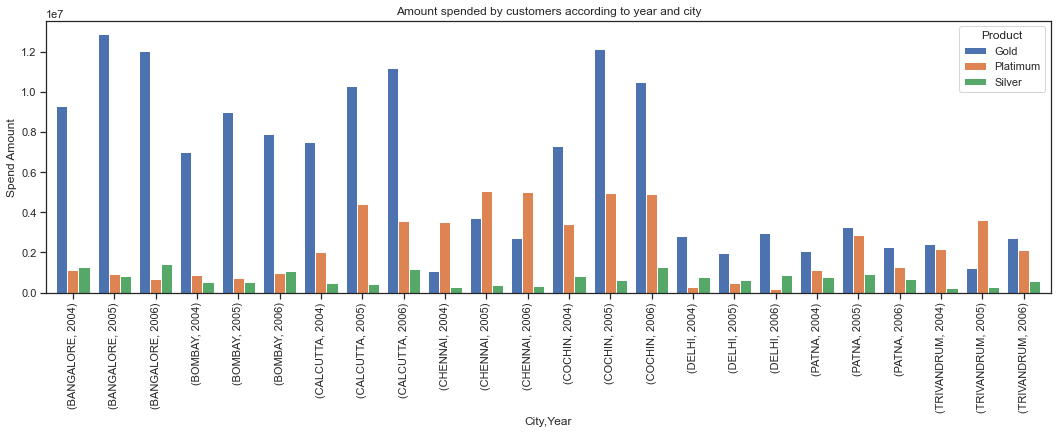

In [61]:
#creating a pivot chart for the same
city_spend.plot(kind="bar",figsize=(18,5),width=0.8)
plt.ylabel("Spend Amount")
plt.title("Amount spended by customers according to year and city")
plt.show()

## 4. Create graphs for -


### a. Monthly comparison of total spends, city wise

In [62]:
customer_spend['Months'] = customer_spend['Month'].apply(lambda x:pd.Timestamp.strftime(x,format='%B'))


In [63]:
month_city = customer_spend.groupby(["Months","City"])[["Amount"]].sum().sort_index().reset_index()
month_city.head()

,Months,City,Amount
0,April,BANGALORE,4207980.48
1,April,BOMBAY,1873785.01
2,April,CALCUTTA,3457507.95
3,April,CHENNAI,2518656.99
4,April,COCHIN,3882744.94


In [64]:
month_city = pd.pivot_table(data= customer_spend,values='Amount',index='City',columns='Months',aggfunc='sum')
month_city.head()

Months,April,August,December,February,January,July,June,March,May,November,October,September
City,,,,,,,,,,,,
BANGALORE,4207980.48,695061.95,422167.24,6734494.76,9041796.84,2228217.69,1330685.90,5362903.07,6383115.13,2260603.07,1091602.61,703018.28
BOMBAY,1873785.01,1066744.75,140040.71,4276988.30,5948993.33,177726.32,1172594.97,5227850.50,3891945.60,2872049.40,676005.70,1278402.79
CALCUTTA,3457507.95,1548354.02,55001.50,8150545.61,9064864.90,2234573.27,2293045.81,4939040.04,5578246.87,2078880.93,196357.83,1511713.57
CHENNAI,2518656.99,305875.97,223628.27,4385815.95,4466961.36,693825.77,1244242.16,3183643.71,2856199.62,1347779.28,156247.17,745759.40
COCHIN,3882744.94,2317306.61,909533.05,5747886.38,11714373.54,1290897.30,2495745.07,5645146.53,6581085.69,3127999.60,868551.89,1382242.90


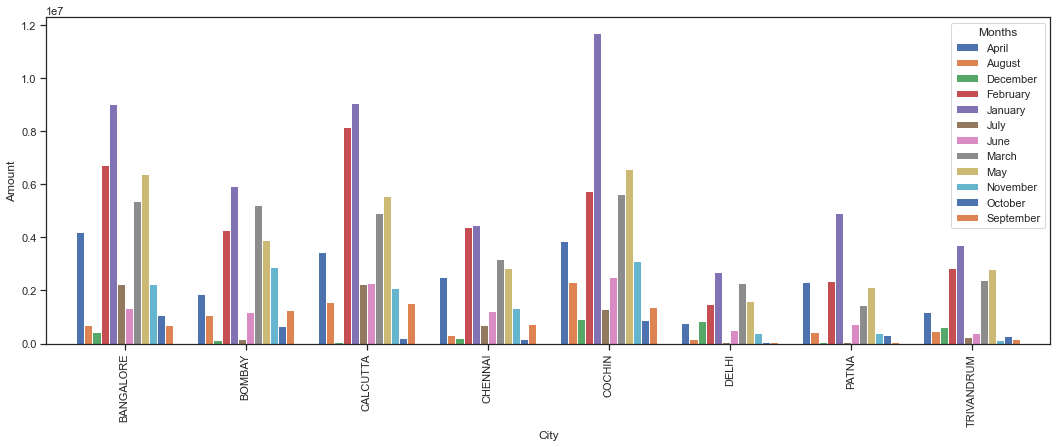

In [65]:
month_city.plot(kind='bar',figsize=(18,6),width=0.8)
plt.ylabel('Amount')
plt.show()

### b. Comparison of yearly spend on air tickets

In [66]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,Year,Months
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,Senior,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,Senior,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,Senior,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,Senior,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,Senior,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,Adult,2004,January
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,Adult,2004,January
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,Adult,2004,January
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,Adult,2004,January


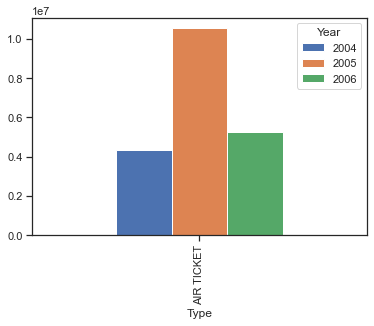

In [67]:
pd.pivot_table(data = customer_spend[customer_spend.Type=='AIR TICKET'], index = 'Type', columns='Year', 
               values='Amount', aggfunc='sum').plot(kind='bar')
plt.show()

### c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)

In [68]:
customer_spend

,No,Customer,Age,City,Product,Limit,Company,Segment,Sl No:,Month,Type,Amount,Age_Group,Year,Months
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,1,2004-01-12,JEWELLERY,485470.80,Senior,2004,January
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2,2004-01-03,PETRO,410556.13,Senior,2004,January
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3,2004-01-15,CLOTHES,23740.46,Senior,2004,January
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4,2004-01-25,FOOD,484342.47,Senior,2004,January
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5,2005-01-17,CAMERA,369694.07,Senior,2005,January
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98,2004-01-25,BIKE,54729.66,Adult,2004,January
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99,2004-01-12,AUTO,5000.00,Adult,2004,January
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100,2004-01-03,SHOPPING,5000.50,Adult,2004,January
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101,2004-01-15,AIR TICKET,5001.00,Adult,2004,January


In [69]:
spend_product = customer_spend.pivot_table(index='Product',columns='Months',values='Amount',aggfunc='sum')

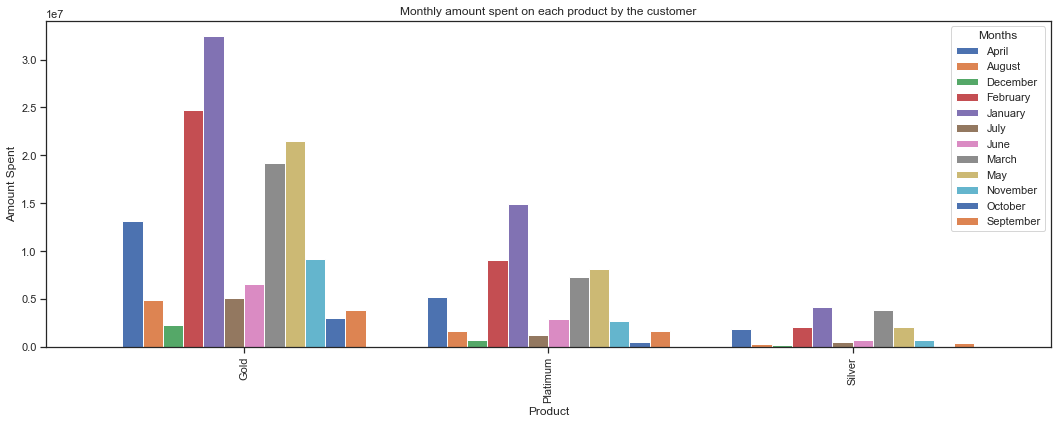

In [70]:
spend_product.plot(kind='bar',figsize=(18,6),width=0.8)
plt.ylabel('Amount Spent')
plt.title('Monthly amount spent on each product by the customer')
plt.show()

### 5. You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.


In [71]:
customer_repay.dtypes

Customer            object
Month       datetime64[ns]
Amount             float64
No                   int64
Age                float64
City                object
Product             object
Limit              float64
Company             object
Segment             object
dtype: object

In [72]:
customer_repay.head()

,Customer,Month,Amount,No,Age,City,Product,Limit,Company,Segment
0,A1,2004-01-12,495414.75,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
1,A1,2004-01-03,245899.02,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
2,A1,2004-01-15,259490.06,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
3,A1,2004-01-25,437555.12,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed
4,A1,2005-01-17,165972.88,1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed


In [73]:
customer_repay['Month']= customer_repay['Month'].apply(lambda x:pd.to_datetime(x))

In [74]:
customer_repay['Yearly']=customer_repay.Month.apply(lambda x:x.year)
customer_repay['Monthly']=customer_repay.Month.apply(lambda x:x.month)

In [75]:
def top10Customers(product_category,time_period):
    return customer_repay.loc[(customer_repay.Product == product_category)].groupby(['Customer','City','Product',time_period]).Amount.sum().reset_index().sort_values('Amount',ascending=False).head(10)

In [78]:
product_category=str(input("Please Enter Product Category(Gold/Silver/Platinum): "))
time_period=str(input("Please Enter Time Period (Yearly/Monthly): "))

Please Enter Product Category(Gold/Silver/Platinum): Gold
Please Enter Time Period (Yearly/Monthly): Yearly


In [79]:
top10Customers_Analysis=top10Customers(product_category,time_period)

In [80]:
top10Customers_Analysis

,Customer,City,Product,Yearly,Amount
64,A61,COCHIN,Gold,2005,4276860.55
55,A44,DELHI,Gold,2005,4165317.77
58,A45,COCHIN,Gold,2005,4042447.57
52,A43,BANGALORE,Gold,2005,4006956.60
13,A13,BANGALORE,Gold,2005,3757673.00
65,A61,COCHIN,Gold,2006,3744127.41
61,A60,CALCUTTA,Gold,2005,3742856.10
14,A13,BANGALORE,Gold,2006,3477314.89
38,A29,CALCUTTA,Gold,2006,3434298.00
35,A28,TRIVANDRUM,Gold,2006,3376614.65
